In [1]:
import os
import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()

In [2]:
spine_data = pd.read_csv('datasets/Dataset_spine.csv',
                         skiprows=1,
                         index_col=False,
                         names = ['pelvic_incidence',
                                  'pelvic_tilt',
                                  'lumbar_lordosis_angle',
                                  'sacral_slope',
                                  'pelvic_radius',
                                  'degree_spondylolisthesis',
                                  'pelvic_slope',
                                  'direct_tilt',
                                  'thoracic_slope',
                                  'cervical_tilt',
                                  'sacrum_angle',
                                  'scoliosis_slope',
                                  'class_att'])
spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [3]:
spine_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_att
0,47.805559,10.688698,54.000000,37.116861,125.391138,-0.402523,0.750424,32.8112,12.0502,15.65862,-4.137017,39.6199,Normal
1,80.654320,26.344379,60.898118,54.309940,120.103493,52.467552,0.931604,20.0845,18.4914,8.98429,-19.329173,31.0862,Abnormal
2,44.318907,12.537992,36.098763,31.780915,124.115836,5.415825,0.664041,9.5021,19.1756,7.25707,-32.893911,19.5695,Abnormal
3,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205,0.928688,14.6686,13.5700,16.12951,-17.630363,28.1902,Abnormal
4,46.442078,8.395036,29.037230,38.047043,115.481405,2.045476,0.806911,27.8754,12.2285,9.55731,-22.358090,14.3317,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,55.080766,-3.759930,56.000000,58.840695,109.915367,31.773583,0.651920,36.7439,9.0278,14.69484,-4.850453,18.1958,Abnormal
306,48.902904,5.587589,55.500000,43.315316,137.108289,19.854759,0.215175,29.8825,9.9608,10.86798,1.956131,23.7274,Normal
307,61.411737,25.384364,39.096869,36.027373,103.404597,21.843407,0.697750,8.4084,15.6980,12.90325,-27.124475,22.9564,Abnormal
308,67.513053,33.275590,96.283062,34.237463,145.601033,88.301486,0.575212,9.1217,19.3240,11.30614,-3.519343,28.2238,Abnormal


In [4]:
spine_data['class_att'].unique()

array(['Normal', 'Abnormal'], dtype=object)

In [5]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


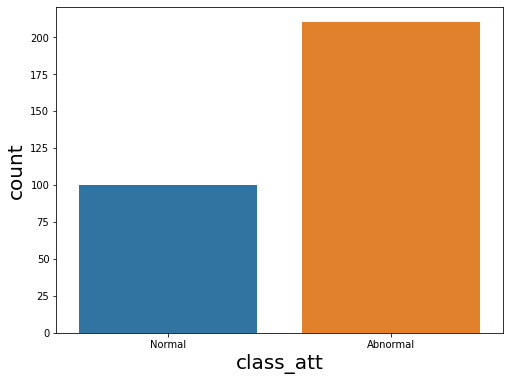

In [6]:
plt.figure(figsize=(8, 6))

sns.countplot('class_att', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('count', fontsize = 20)

plt.show()

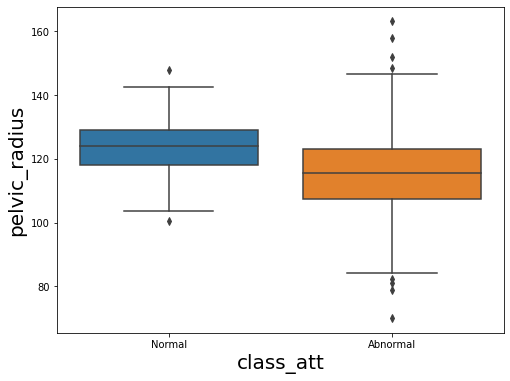

In [7]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'pelvic_radius', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('pelvic_radius', fontsize = 20)

plt.show()

In [8]:
class_att = {'Abnormal': 0, 'Normal': 1}

spine_data['class_att'].replace(class_att, inplace=True)

spine_data[['class_att']].sample(10)

,class_att
126,1
67,1
74,0
297,1
44,0
179,1
281,0
47,0
236,0
255,0


In [9]:
features = spine_data.drop('class_att', axis=1)

target = spine_data[['class_att']]

In [10]:
standardScaler = StandardScaler()

scaled_features = pd.DataFrame(standardScaler.fit_transform(features),
                               columns = features.columns,
                               index = features.index)

scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,-7.592493e-17,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
pelvic_tilt,310.0,2.234772e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
lumbar_lordosis_angle,310.0,1.876635e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
sacral_slope,310.0,-1.317942e-16,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
pelvic_radius,310.0,-6.818918e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
degree_spondylolisthesis,310.0,-7.162729e-19,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350
pelvic_slope,310.0,-5.730183e-18,1.001617,-1.646397,-0.871329,0.010547,0.812640,1.842974
direct_tilt,310.0,7.449238e-17,1.001617,-1.657245,-0.958454,0.067895,0.884884,1.788002
thoracic_slope,310.0,-7.850351e-16,1.001617,-1.775578,-0.779769,-0.037140,0.832300,1.844158
cervical_tilt,310.0,-4.154383e-16,1.001617,-1.697267,-0.828145,0.007103,0.844180,1.692090


In [11]:
scaled_features.shape

(310, 12)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,
                                                    target,
                                                    test_size = 0.15,
                                                    random_state = 10)

In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((263, 12), (263, 1), (47, 12), (47, 1))

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.15,
                                                  random_state=10)

In [15]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((223, 12), (223, 1), (40, 12), (40, 1))

In [16]:
def build_and_compile_model():

    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    x = layers.Dense(16, activation='relu')(inputs)

    x = layers.Dropout(0.3)(x)

    x = layers.Dense(8, activation='relu')(x)

    predictions = layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=predictions)

    model.summary()

    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5)])

    return model

In [17]:
model = build_and_compile_model()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


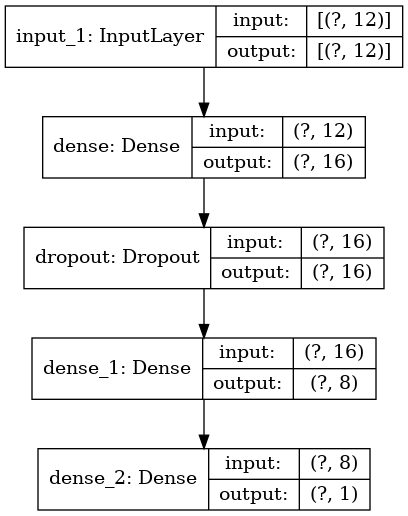

In [18]:
keras.utils.plot_model(model, 'model_clasification_shapes.png', show_shapes=True)

In [19]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 12), (None, 1)), types: (tf.float64, tf.int64)>

In [20]:
num_epochs = 10

In [21]:
model.fit(dataset_train, epochs=num_epochs)

Epoch 1/10
14/14 [==============================] - 0s 11ms/step - loss: 0.5936 - accuracy: 0.6726 - precision: 0.5400 - recall: 0.3506
Epoch 2/10
14/14 [==============================] - 0s 7ms/step - loss: 0.5931 - accuracy: 0.6547 - precision: 0.5000 - recall: 0.3247
Epoch 3/10
14/14 [==============================] - 0s 8ms/step - loss: 0.5493 - accuracy: 0.7130 - precision: 0.6444 - recall: 0.3766
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5271 - accuracy: 0.7220 - precision: 0.6667 - recall: 0.3896
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5424 - accuracy: 0.7220 - precision: 0.6596 - recall: 0.4026
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.7444 - precision: 0.7174 - recall: 0.4286
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5182 - accuracy: 0.7220 - precision: 0.6531 - recall: 0.4156
Epoch 8/10
14/14 [==============================] - 0s

In [22]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [23]:
model = build_and_compile_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data = dataset_val)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 1s 91ms/step - loss: 0.8320 - accuracy: 0.3991 - precision_1: 0.3137 -

In [24]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

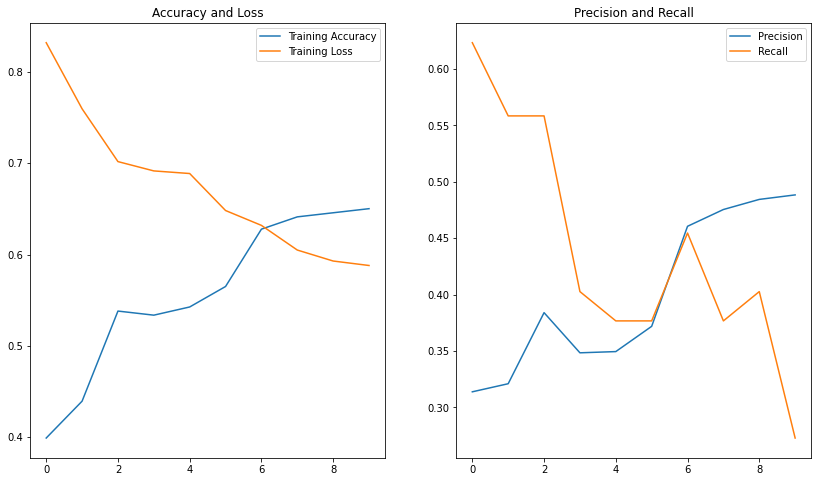

In [27]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_1']
recall = training_history.history['recall_1']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

In [28]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[0.2670613 ],
       [0.32326263],
       [0.19171312],
       [0.31173283],
       [0.36365092],
       [0.34467   ],
       [0.5393839 ],
       [0.15293685],
       [0.498026  ],
       [0.3531464 ]], dtype=float32)

In [29]:
y_pred = np.where(y_pred >= 0.5, 1, y_pred)
y_pred = np.where(y_pred < 0.5, 0, y_pred)

In [30]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [31]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32')},
                            index=range(len(y_pred)))